In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from scipy.stats import skew

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.feature_selection import chi2           
from sklearn.feature_selection import f_regression  
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA

from sklearn.ensemble import VotingClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from mlxtend.classifier import StackingClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

C:\Users\omkar\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [45]:
df.shape

(303, 14)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [4]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

## Null-Value using heatmap
Yellow Lines represent the missing value,Hence yellow lines are not here there is no missing value

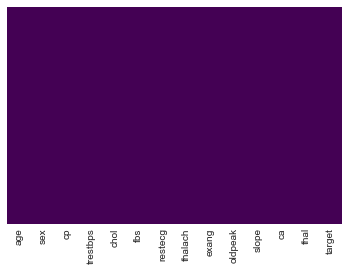

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## EDA

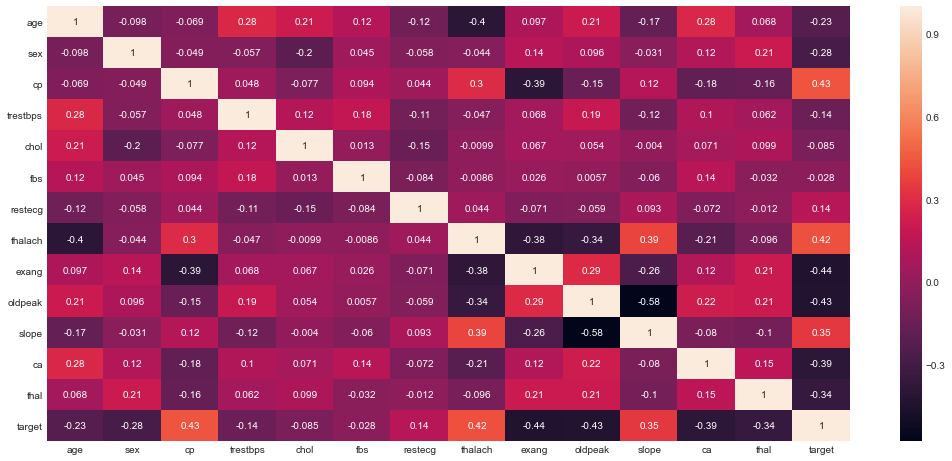

In [7]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [8]:
sex0 = df.loc[(df["sex"] == 0)]
sex0.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1


In [9]:
sex1 = df.loc[(df["sex"] == 1)]
sex1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1


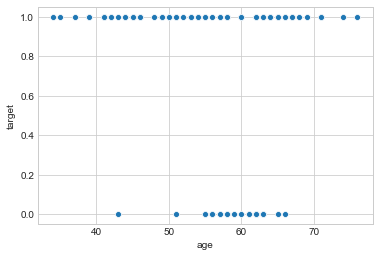

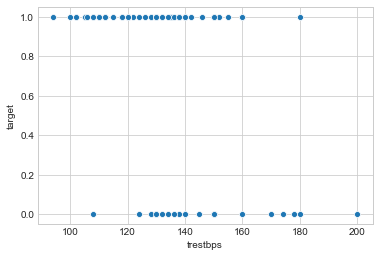

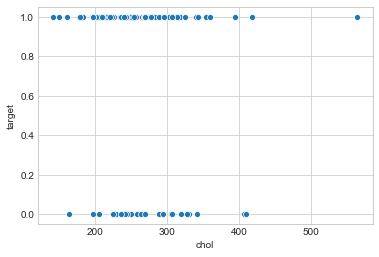

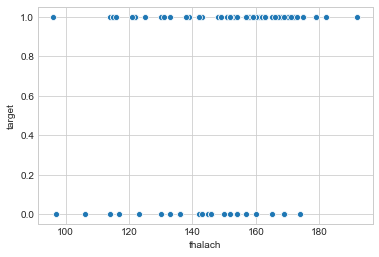

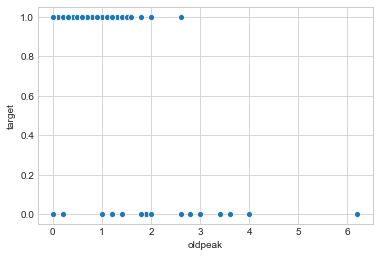

In [10]:
col=["age","trestbps","chol","thalach","oldpeak"]
for c in col:
    plt.figure()
    sns.scatterplot(data=sex0,y="target",x=c)
    plt.show()

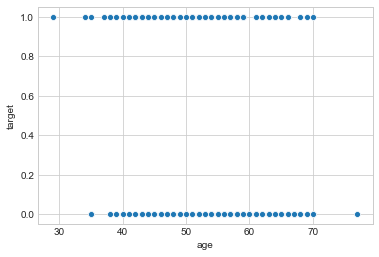

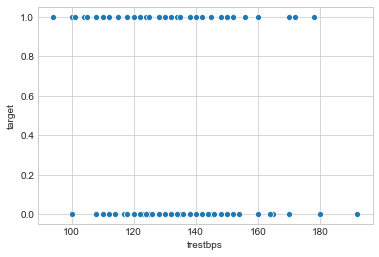

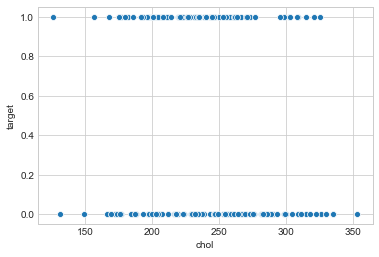

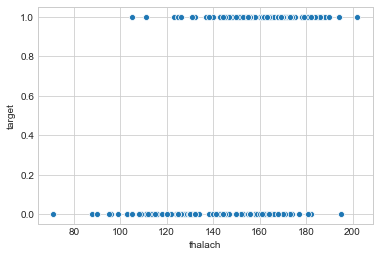

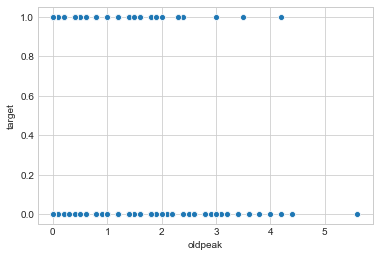

In [11]:
for c in col:
    plt.figure()
    sns.scatterplot(data=sex1,y="target",x=c)
    plt.show()

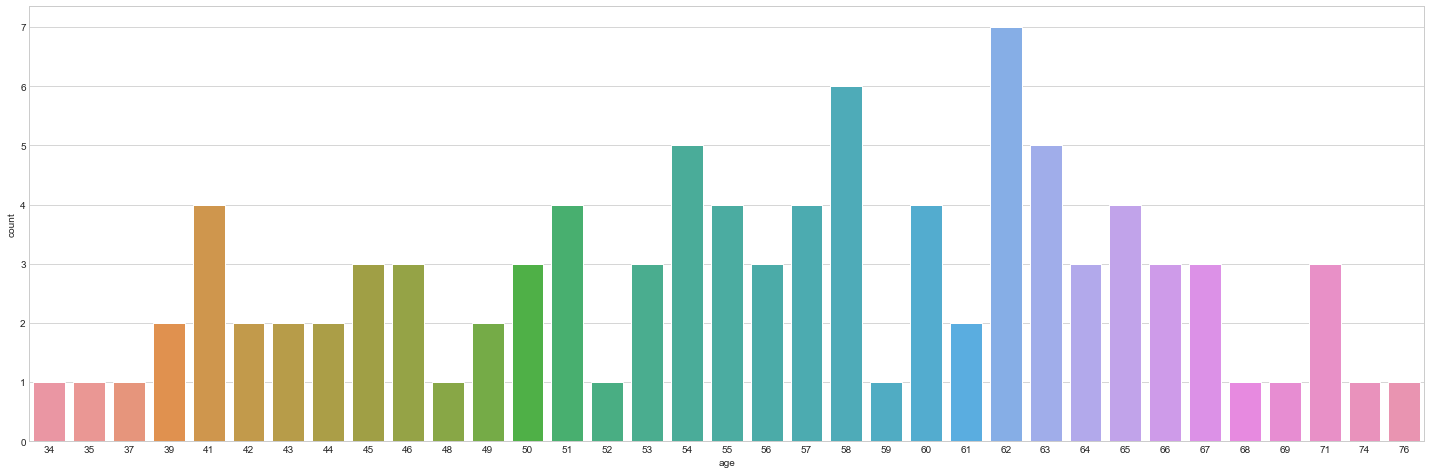

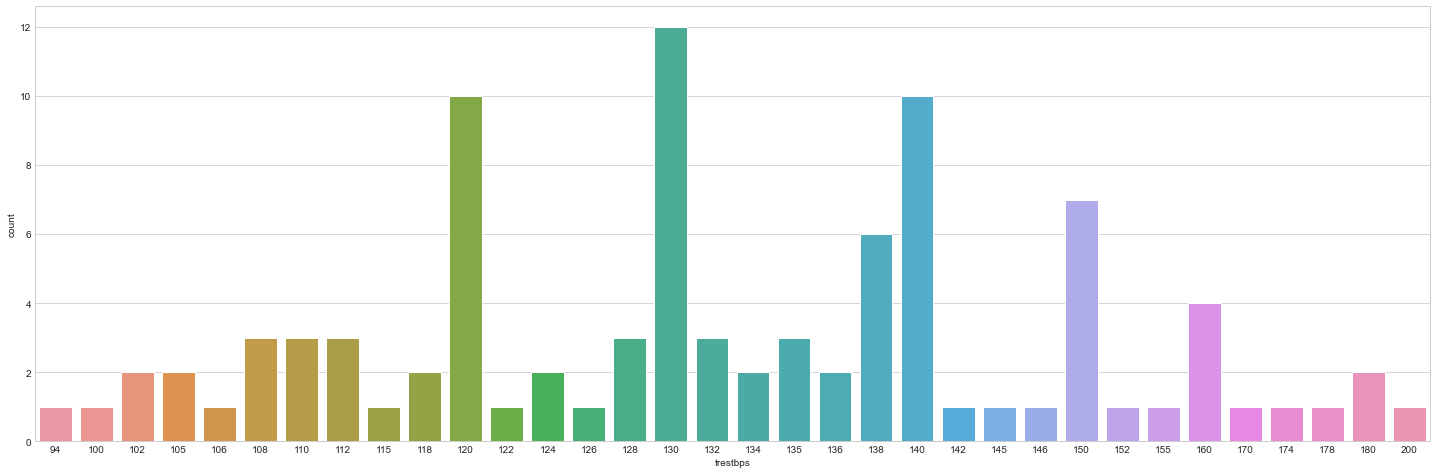

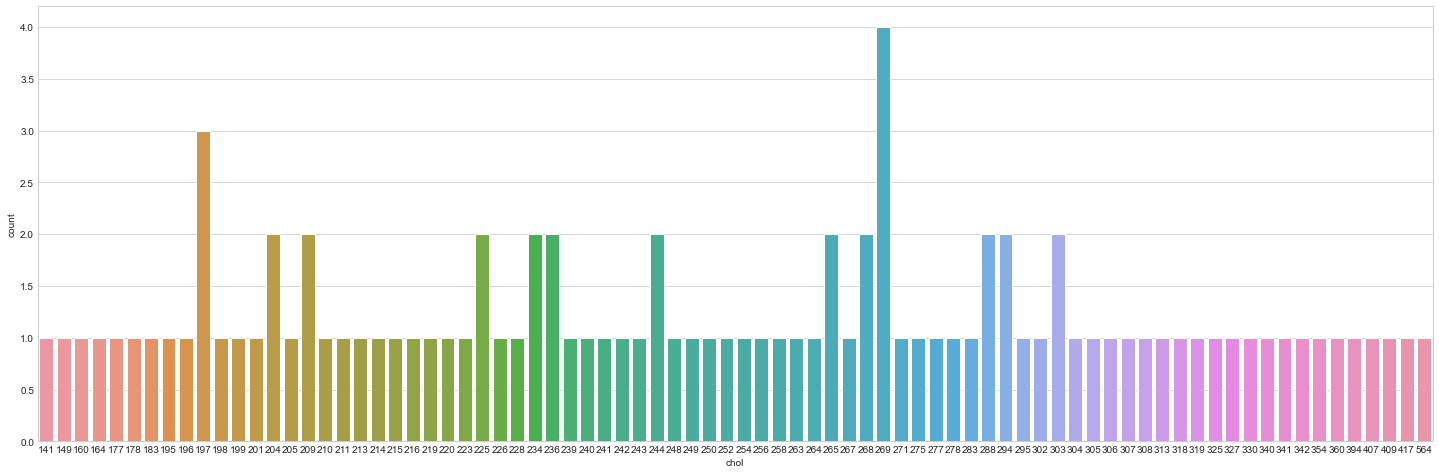

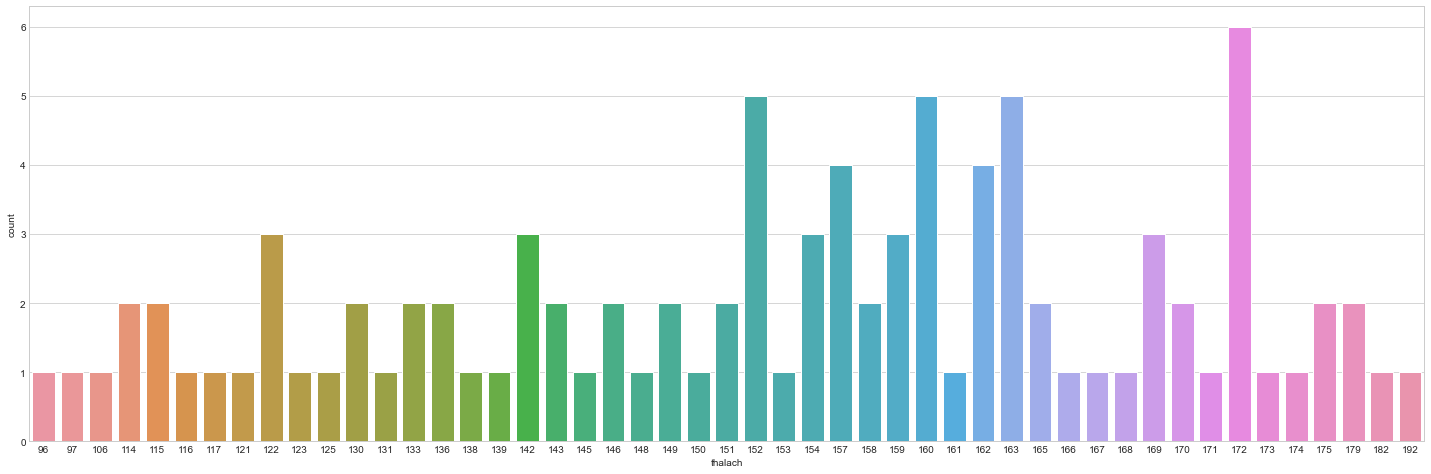

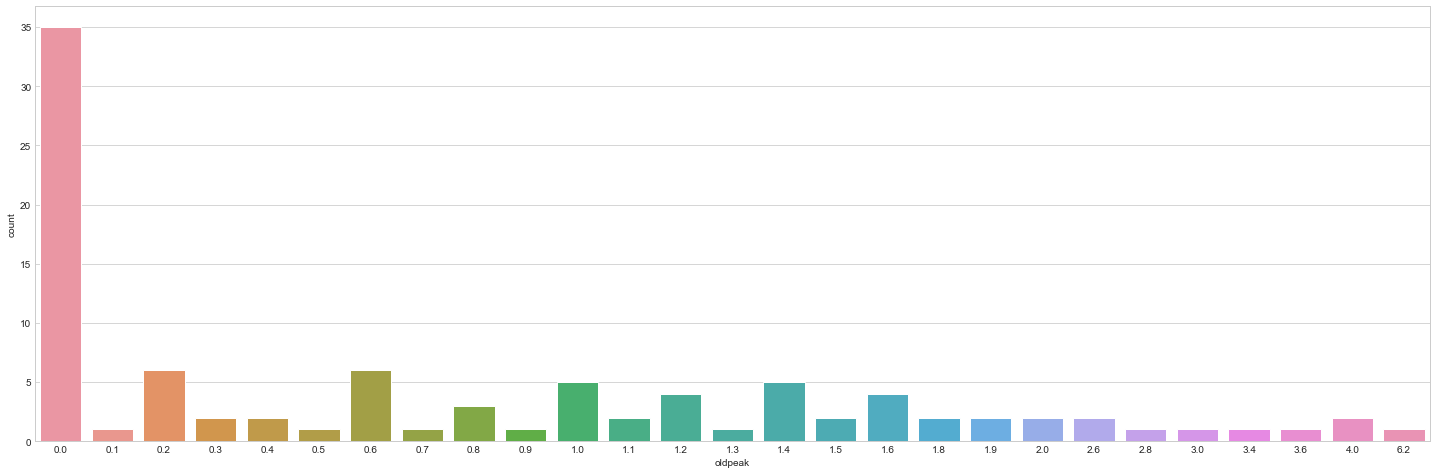

In [12]:
for c in col:
    plt.figure(figsize=(25,8))
    sns.countplot(data=sex0,x=c)
    plt.show()

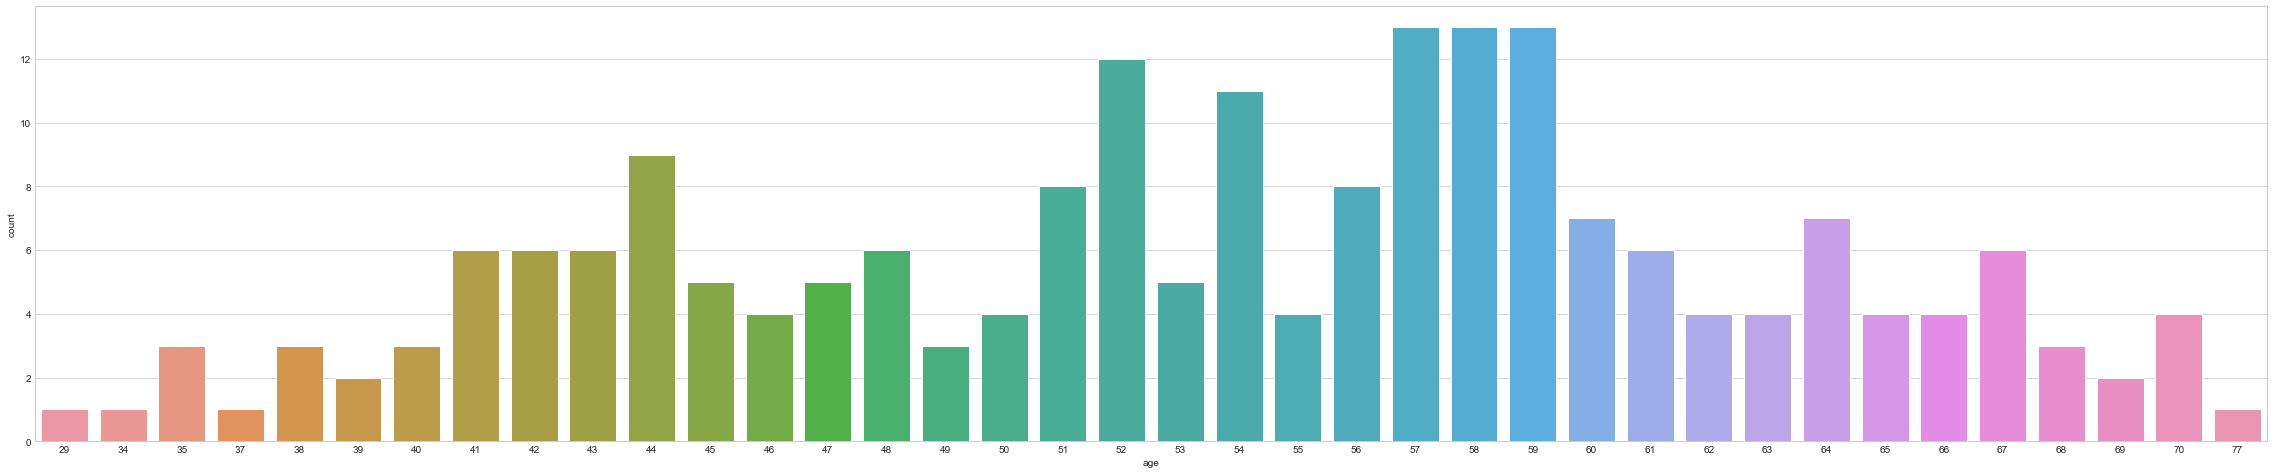

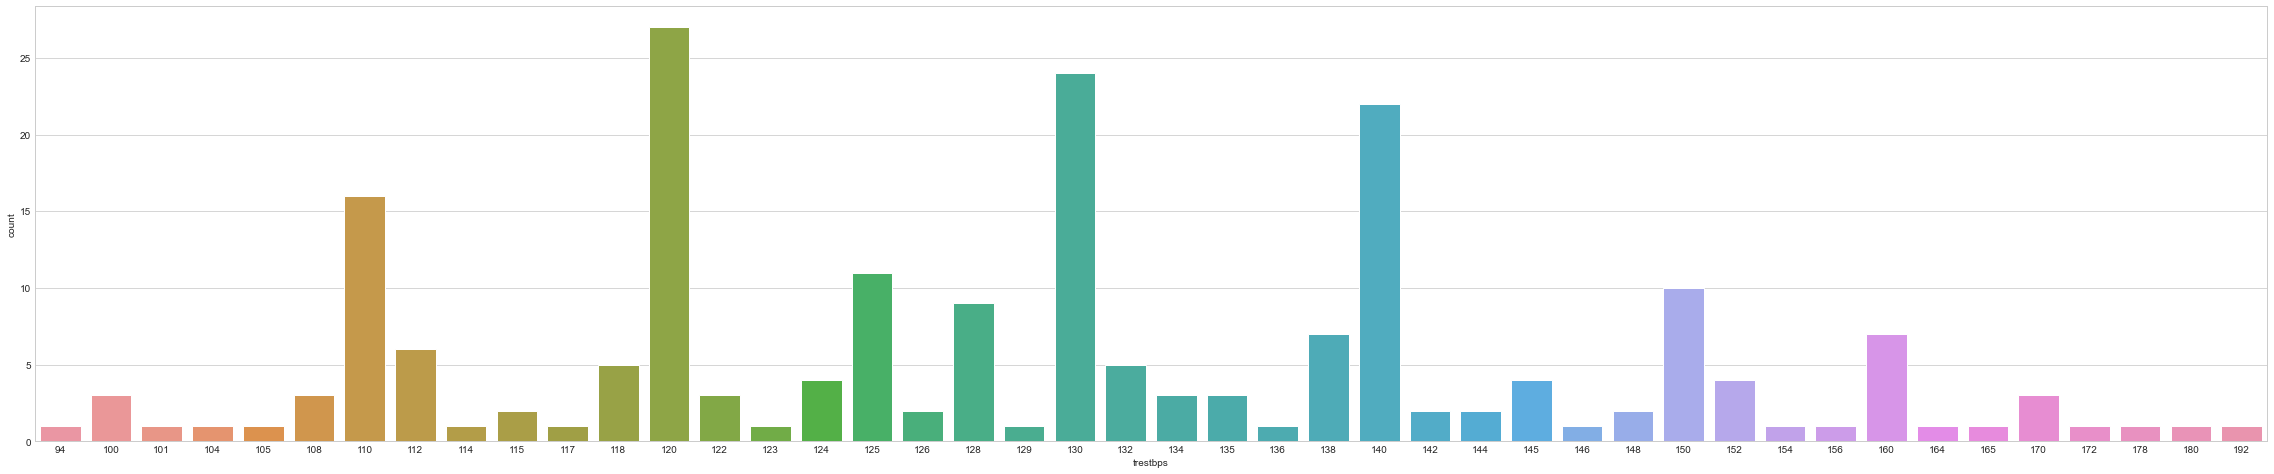

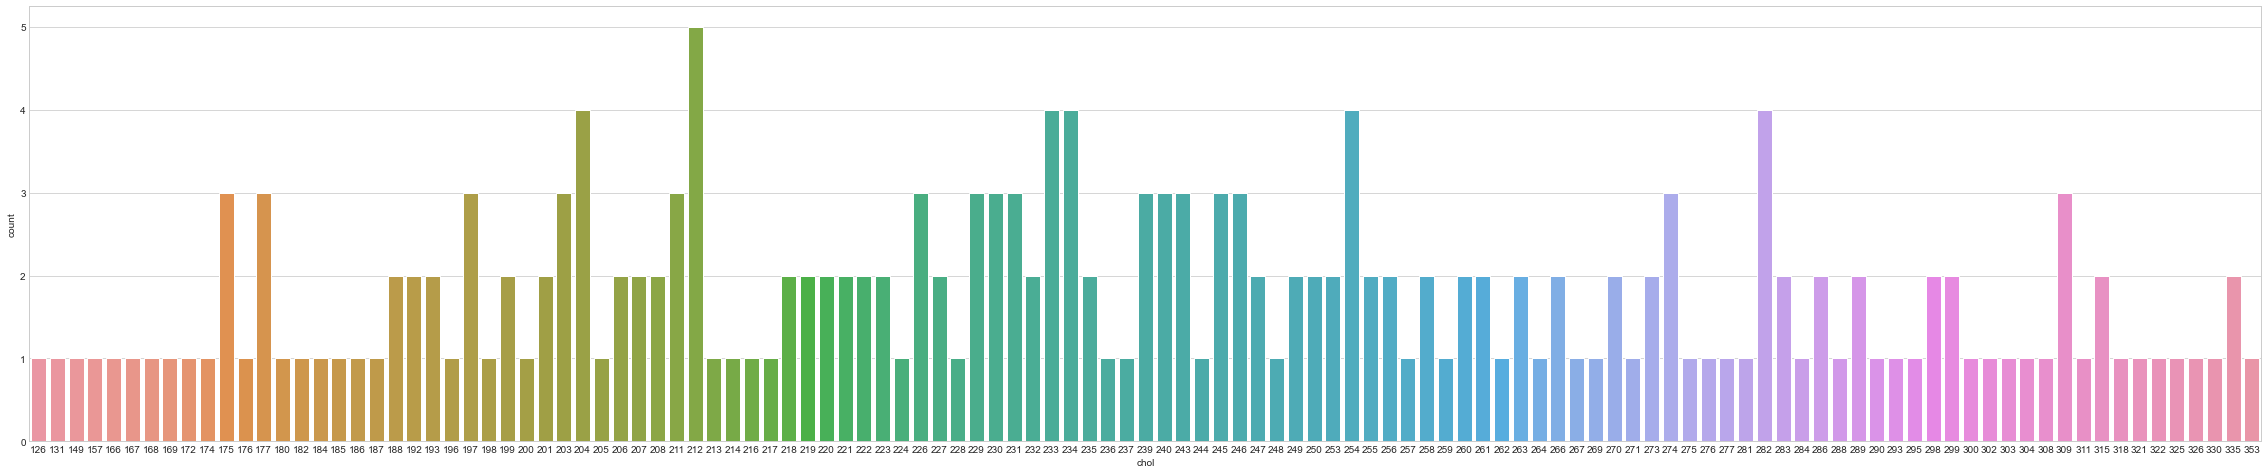

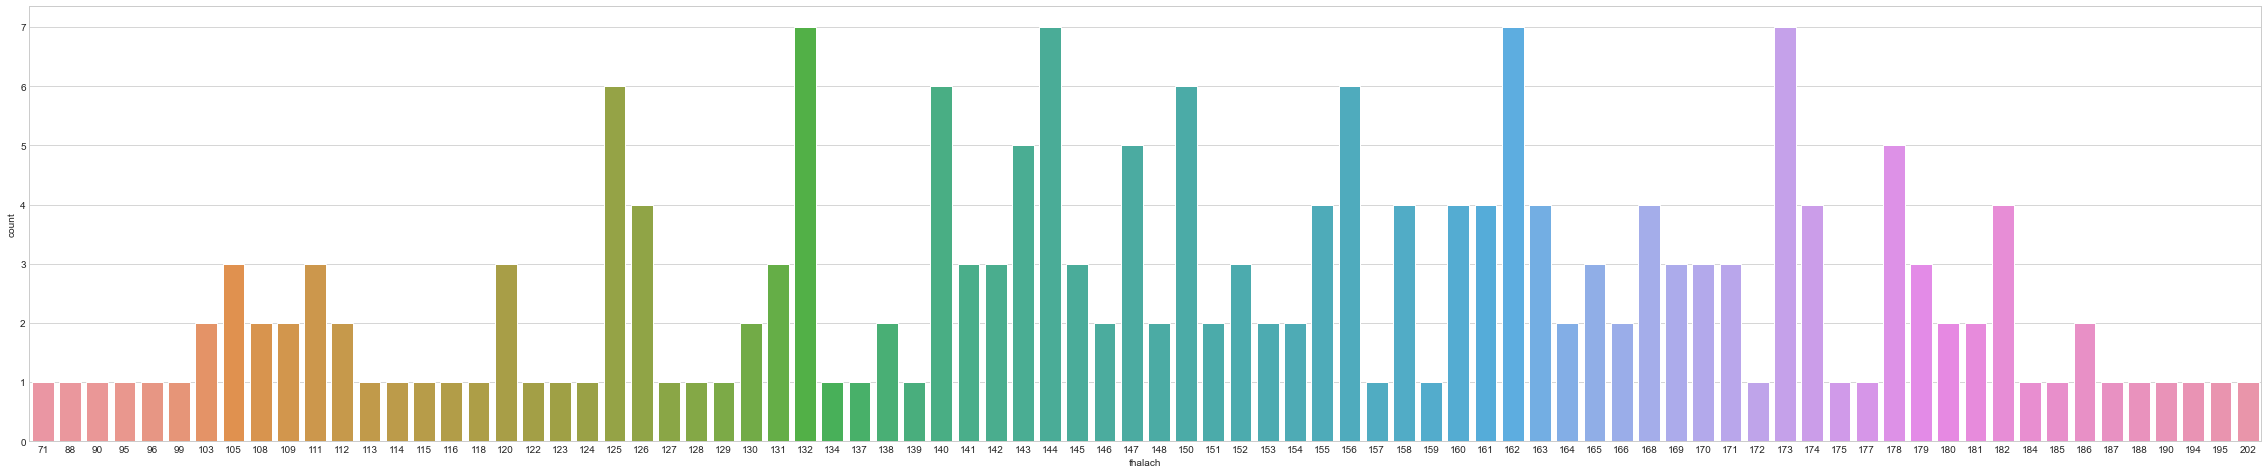

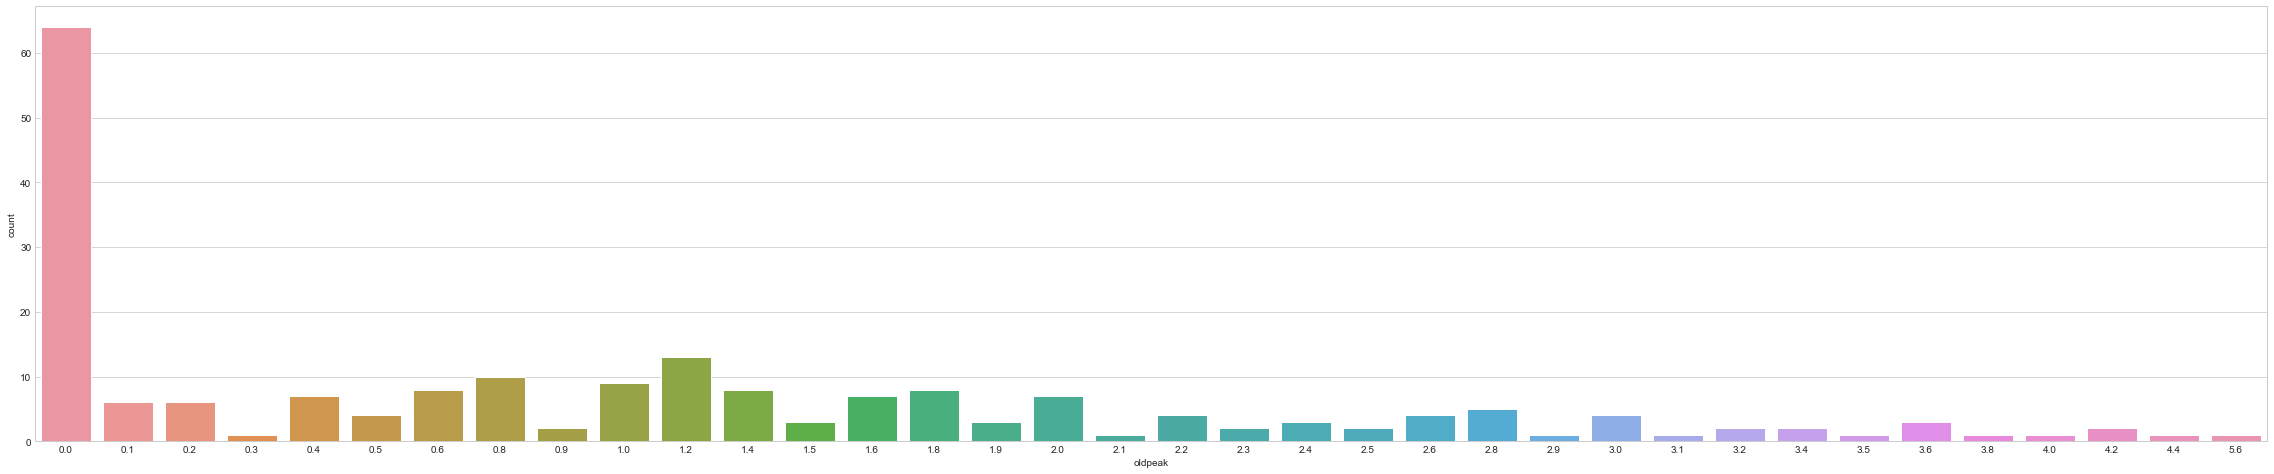

In [13]:
for c in col:
    plt.figure(figsize=(40,8))
    sns.countplot(data=sex1,x=c)
    plt.show()

## JointPlot
allows to study the relationship between 2 numeric variables.
It is usually a scatterplot.

<Figure size 432x288 with 0 Axes>

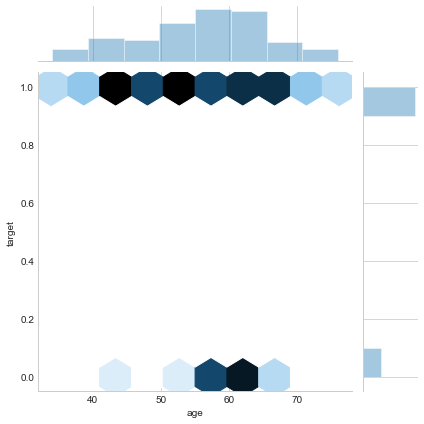

<Figure size 432x288 with 0 Axes>

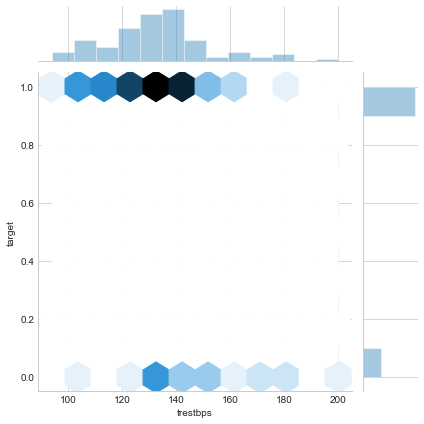

<Figure size 432x288 with 0 Axes>

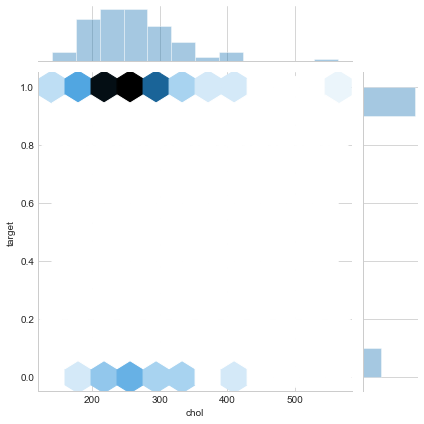

<Figure size 432x288 with 0 Axes>

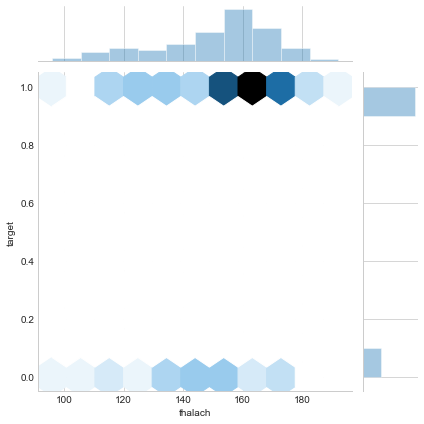

<Figure size 432x288 with 0 Axes>

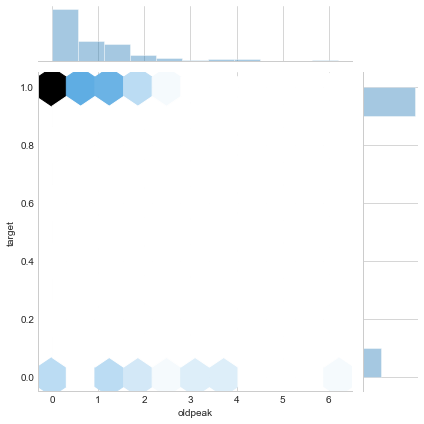

In [14]:
for c in col:
    plt.figure()
    sns.jointplot(x=c,y='target',data=sex0,kind='hex')
    plt.show()

<Figure size 432x288 with 0 Axes>

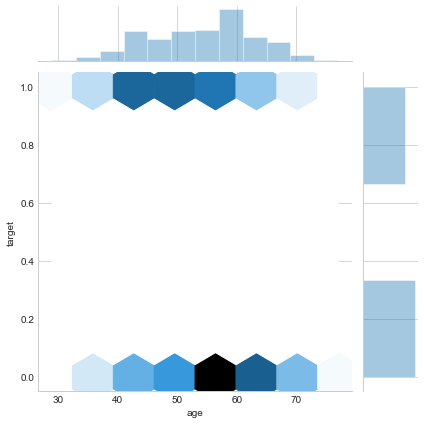

<Figure size 432x288 with 0 Axes>

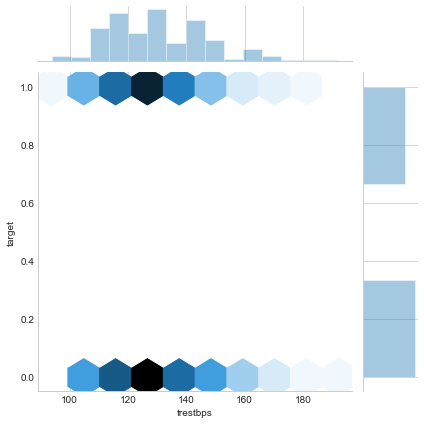

<Figure size 432x288 with 0 Axes>

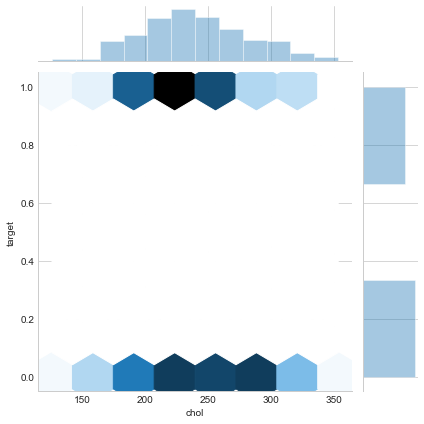

<Figure size 432x288 with 0 Axes>

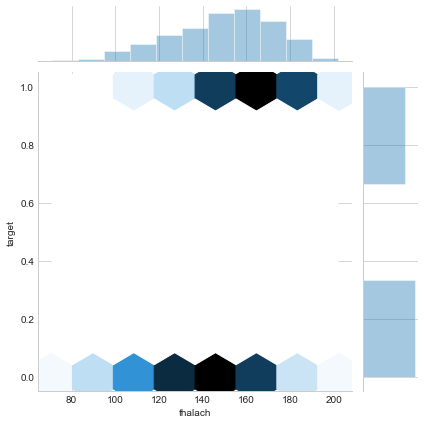

<Figure size 432x288 with 0 Axes>

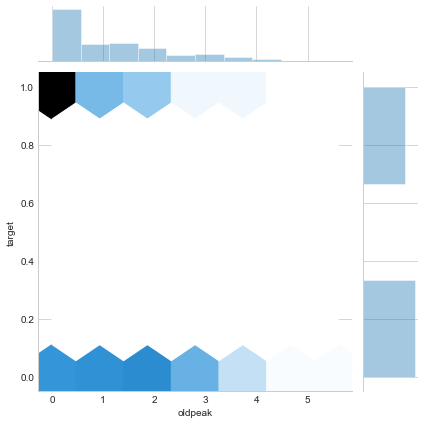

In [15]:
for c in col:
    plt.figure()
    sns.jointplot(x=c,y='target',data=sex1,kind='hex')
    plt.show()

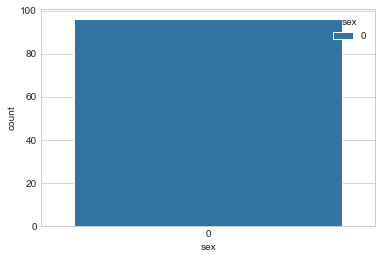

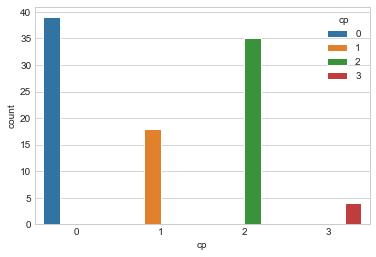

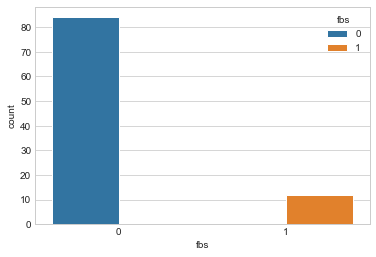

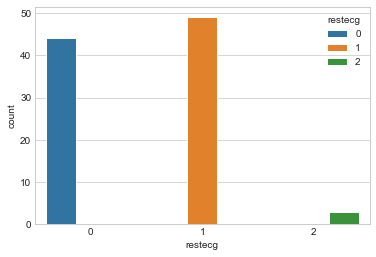

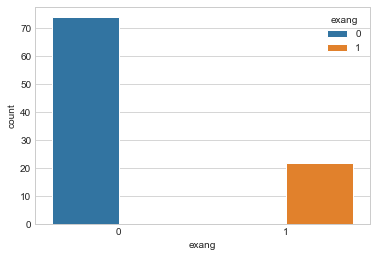

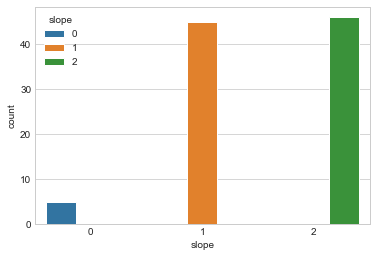

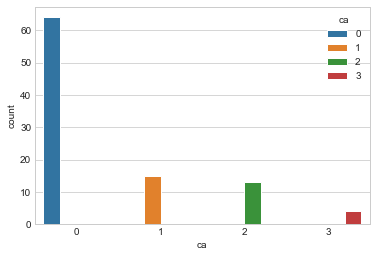

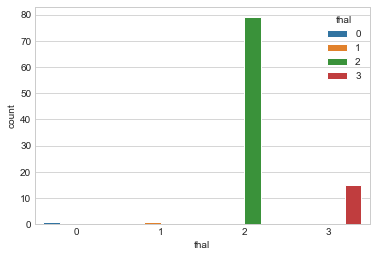

In [16]:
cat=['sex','cp','fbs','restecg','exang','slope','ca','thal']
for c in cat:
    plt.figure()
    sns.countplot(data=sex0,x=c,hue=c)
    plt.show()

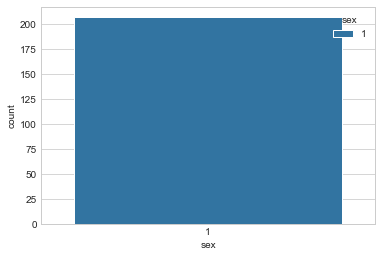

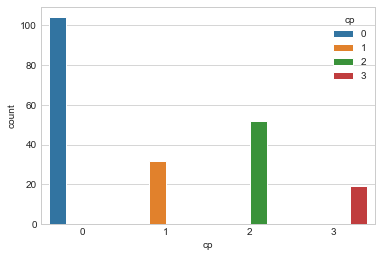

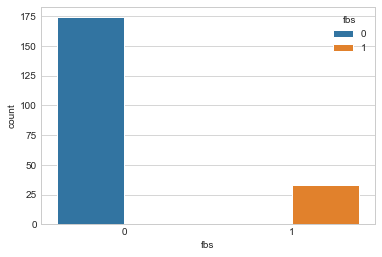

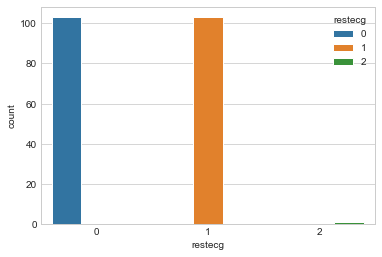

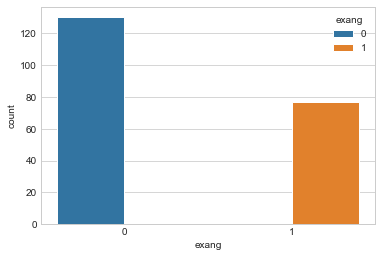

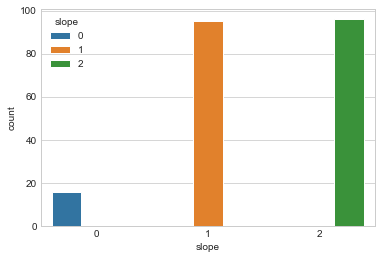

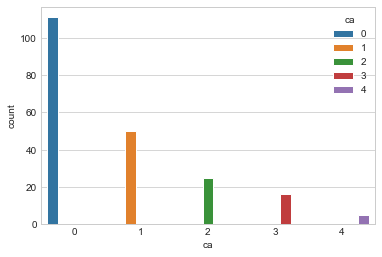

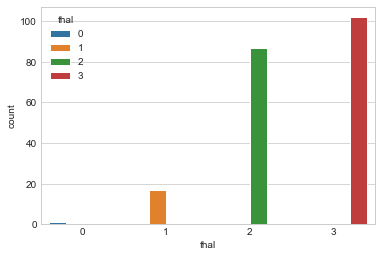

In [17]:
for c in cat:
    plt.figure()
    sns.countplot(data=sex1,x=c,hue=c)
    plt.show()

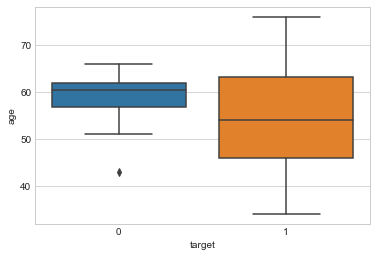

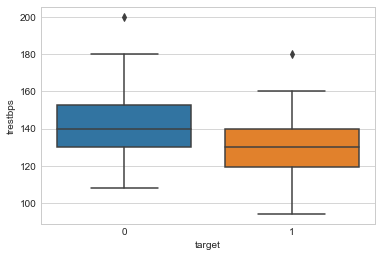

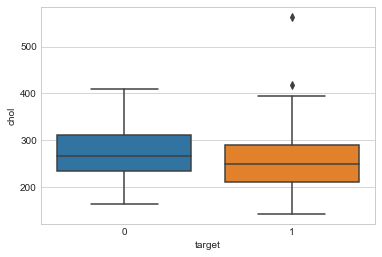

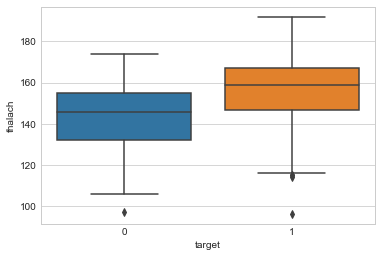

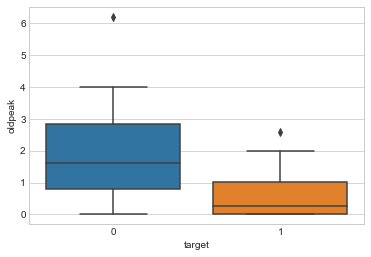

In [18]:
for c in col:
    plt.figure()
    sns.boxplot(data=sex0,x="target",y=c)
    plt.show()

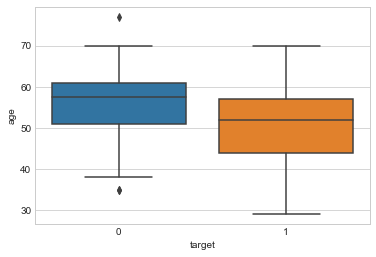

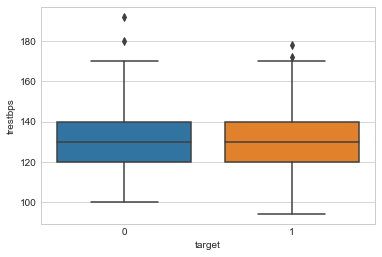

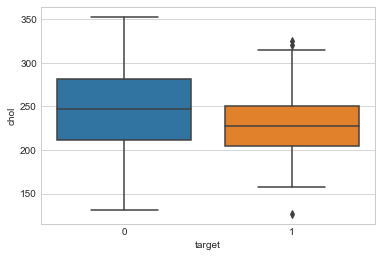

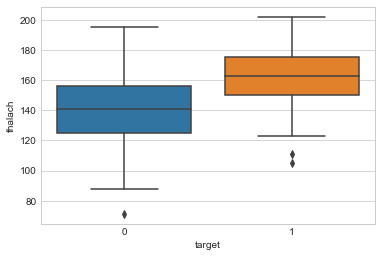

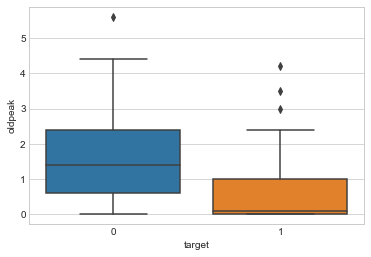

In [19]:
for c in col:
    plt.figure()
    sns.boxplot(data=sex1,x="target",y=c)
    plt.show()

## Scaling Features

In [20]:
for c in col:
    ss=StandardScaler()
    df[c]=ss.fit_transform(df[[c]])

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


## Spliting Dataset

In [22]:
X=df.drop("target",axis=1)
y=df["target"]

In [23]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

## Training Dataset

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [25]:
def classify(model):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(classification_report(y_test,y_pred))
    return model

## Logistic Regression

In [26]:
lg=LogisticRegression(random_state=1)
classify(lg)

              precision    recall  f1-score   support

           0       0.77      0.73      0.75        41
           1       0.79      0.82      0.80        50

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Decision Tree

In [27]:
dt1=DecisionTreeClassifier(random_state=1)
classify(dt1)

              precision    recall  f1-score   support

           0       0.69      0.80      0.74        41
           1       0.81      0.70      0.75        50

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.76      0.75      0.75        91



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [28]:
dt2 = DecisionTreeClassifier(min_samples_leaf=8,criterion="entropy")
classify(dt2)

              precision    recall  f1-score   support

           0       0.71      0.73      0.72        41
           1       0.78      0.76      0.77        50

    accuracy                           0.75        91
   macro avg       0.74      0.75      0.75        91
weighted avg       0.75      0.75      0.75        91



DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## RandomForest

In [29]:
rfc=RandomForestClassifier(n_estimators=50,max_features=6,random_state=1)
classify(rfc)

              precision    recall  f1-score   support

           0       0.72      0.71      0.72        41
           1       0.76      0.78      0.77        50

    accuracy                           0.75        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.75      0.75      0.75        91



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [30]:
def feature_select(criterion,count,model):
    test=SelectKBest(score_func=criterion,k=count)
    X_train_new=test.fit_transform(X_train,y_train)
    X_test_new=test.transform(X_test)
    
    model.fit(X_train_new,y_train)
    y_pred=model.predict(X_test_new)
    print(classification_report(y_test,y_pred))
    
    print(test.get_support())
    return model

In [31]:
def pca(count,model):
    pc=PCA(n_components=count,random_state=1)
    X_train_new=pc.fit_transform(X_train,y_train)
    X_test_new=pc.transform(X_test)
    
    model.fit(X_train_new,y_train)
    y_pred=model.predict(X_test_new)
    print(classification_report(y_test,y_pred))
    
    print(pc.components_)
    return model

## After Feature selection

In [42]:
# Feature selected Logistic regression

feature_select(f_regression,10,lg)

              precision    recall  f1-score   support

           0       0.81      0.73      0.77        41
           1       0.80      0.86      0.83        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91

[ True  True  True False False False  True  True  True  True  True  True
  True]


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
pca(8,lg)

              precision    recall  f1-score   support

           0       0.81      0.71      0.75        41
           1       0.78      0.86      0.82        50

    accuracy                           0.79        91
   macro avg       0.79      0.78      0.79        91
weighted avg       0.79      0.79      0.79        91

[[ 0.46240979  0.02013762 -0.29608588  0.21568657  0.15581101  0.02732515
  -0.06298048 -0.53012455  0.16206081  0.37726105 -0.19400071  0.35215146
   0.1064203 ]
 [ 0.28546488 -0.04597501  0.59645302  0.66729659  0.18574629  0.06438944
  -0.04654894  0.23398113 -0.0953561   0.08387958  0.01309484 -0.05469861
  -0.02239451]
 [-0.25100983  0.02234136  0.07375069  0.11177352 -0.32834163 -0.03077953
   0.0528209  -0.19984634  0.08741132  0.53835999 -0.31567577 -0.60804008
  -0.01555917]
 [ 0.33687552  0.00800462  0.5066836  -0.30474812 -0.59366242  0.01393901
   0.07347617 -0.32461329 -0.09095666 -0.10427215  0.04132569  0.17650223
  -0.14643284]
 [-0.4637723   0.1558

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Linear SVM

In [50]:
lsvc=LinearSVC(random_state=1)
classify(lsvc)

              precision    recall  f1-score   support

           0       0.76      0.71      0.73        41
           1       0.77      0.82      0.80        50

    accuracy                           0.77        91
   macro avg       0.77      0.76      0.77        91
weighted avg       0.77      0.77      0.77        91



LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
          verbose=0)

In [64]:
# Soft-Margin

lsvc_soft=LinearSVC(C=0.7,random_state=1)
classify(lsvc_soft)

              precision    recall  f1-score   support

           0       0.76      0.71      0.73        41
           1       0.77      0.82      0.80        50

    accuracy                           0.77        91
   macro avg       0.77      0.76      0.77        91
weighted avg       0.77      0.77      0.77        91



LinearSVC(C=0.7, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
          verbose=0)

## Radial bias svm

In [65]:
svc_rbf=SVC(C=0.5,kernel="rbf",random_state=1)
classify(svc_rbf)

              precision    recall  f1-score   support

           0       0.83      0.71      0.76        41
           1       0.79      0.88      0.83        50

    accuracy                           0.80        91
   macro avg       0.81      0.79      0.80        91
weighted avg       0.81      0.80      0.80        91



SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=1,
    shrinking=True, tol=0.001, verbose=False)

## Poly Svm

In [70]:
svc_poly=SVC(C=0.5,kernel="poly",random_state=1)
classify(svc_poly)

              precision    recall  f1-score   support

           0       0.87      0.66      0.75        41
           1       0.77      0.92      0.84        50

    accuracy                           0.80        91
   macro avg       0.82      0.79      0.79        91
weighted avg       0.81      0.80      0.80        91



SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=1,
    shrinking=True, tol=0.001, verbose=False)

## Feature Selection on SVM

In [72]:
feature_select(f_regression,10,svc_poly)

              precision    recall  f1-score   support

           0       0.91      0.71      0.79        41
           1       0.80      0.94      0.86        50

    accuracy                           0.84        91
   macro avg       0.85      0.82      0.83        91
weighted avg       0.85      0.84      0.83        91

[ True  True  True False False False  True  True  True  True  True  True
  True]


SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=1,
    shrinking=True, tol=0.001, verbose=False)

In [75]:
feature_select(f_regression,10,lsvc)

              precision    recall  f1-score   support

           0       0.78      0.71      0.74        41
           1       0.78      0.84      0.81        50

    accuracy                           0.78        91
   macro avg       0.78      0.77      0.78        91
weighted avg       0.78      0.78      0.78        91

[ True  True  True False False False  True  True  True  True  True  True
  True]


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
          verbose=0)

In [78]:
feature_select(f_regression,10,lsvc_soft)

              precision    recall  f1-score   support

           0       0.81      0.71      0.75        41
           1       0.78      0.86      0.82        50

    accuracy                           0.79        91
   macro avg       0.79      0.78      0.79        91
weighted avg       0.79      0.79      0.79        91

[ True  True  True False False False  True  True  True  True  True  True
  True]


LinearSVC(C=0.7, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
          verbose=0)

In [83]:
feature_select(f_regression,8,svc_rbf)

              precision    recall  f1-score   support

           0       0.85      0.71      0.77        41
           1       0.79      0.90      0.84        50

    accuracy                           0.81        91
   macro avg       0.82      0.80      0.81        91
weighted avg       0.82      0.81      0.81        91

[False  True  True False False False False  True  True  True  True  True
  True]


SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=1,
    shrinking=True, tol=0.001, verbose=False)

In [84]:
pca(8,lsvc)

              precision    recall  f1-score   support

           0       0.81      0.71      0.75        41
           1       0.78      0.86      0.82        50

    accuracy                           0.79        91
   macro avg       0.79      0.78      0.79        91
weighted avg       0.79      0.79      0.79        91

[[ 0.46240979  0.02013762 -0.29608588  0.21568657  0.15581101  0.02732515
  -0.06298048 -0.53012455  0.16206081  0.37726105 -0.19400071  0.35215146
   0.1064203 ]
 [ 0.28546488 -0.04597501  0.59645302  0.66729659  0.18574629  0.06438944
  -0.04654894  0.23398113 -0.0953561   0.08387958  0.01309484 -0.05469861
  -0.02239451]
 [-0.25100983  0.02234136  0.07375069  0.11177352 -0.32834163 -0.03077953
   0.0528209  -0.19984634  0.08741132  0.53835999 -0.31567577 -0.60804008
  -0.01555917]
 [ 0.33687552  0.00800462  0.5066836  -0.30474812 -0.59366242  0.01393901
   0.07347617 -0.32461329 -0.09095666 -0.10427215  0.04132569  0.17650223
  -0.14643284]
 [-0.4637723   0.1558

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
          verbose=0)

In [87]:
pca(11,svc_rbf)

              precision    recall  f1-score   support

           0       0.83      0.71      0.76        41
           1       0.79      0.88      0.83        50

    accuracy                           0.80        91
   macro avg       0.81      0.79      0.80        91
weighted avg       0.81      0.80      0.80        91

[[ 0.46240979  0.02013762 -0.29608588  0.21568657  0.15581101  0.02732515
  -0.06298048 -0.53012455  0.16206081  0.37726105 -0.19400071  0.35215146
   0.1064203 ]
 [ 0.28546488 -0.04597501  0.59645302  0.66729659  0.18574629  0.06438944
  -0.04654894  0.23398113 -0.0953561   0.08387958  0.01309484 -0.05469861
  -0.02239451]
 [-0.25100983  0.02234136  0.07375069  0.11177352 -0.32834163 -0.03077953
   0.0528209  -0.19984634  0.08741132  0.53835999 -0.31567577 -0.60804008
  -0.01555917]
 [ 0.33687552  0.00800462  0.5066836  -0.30474812 -0.59366242  0.01393901
   0.07347617 -0.32461329 -0.09095666 -0.10427215  0.04132569  0.17650223
  -0.14643284]
 [-0.4637723   0.1558

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=1,
    shrinking=True, tol=0.001, verbose=False)

#### Feature Selected Polynomial SVM with 10 features gives Good accuracy 84% and recall 94%.